# Predicting Success of Islamic Crowdfunding Campaigns in Indonesia

**Ratu Ghifa Nazila Ramdiania**

## Introduction

Islamic social finance, including donation-based crowdfunding, has become an essential tool to mobilize support for communities in need. However, an exploratory analysis of 2,459 campaigns reveals a significant bottleneck: **only 8.62% of campaigns successfully reached their funding target**.

This low success rate highlights inefficiencies in how crowdfunding platforms and organizers allocate their limited resources — from homepage visibility to paid promotions on social media.

In particular, while homepage curation is not paid by fundraisers, it requires platform resources to manage and maintain. Meanwhile, campaigns promoted through paid social ads (e.g., on Instagram or TikTok) often use the fundraisers’ own contributions to cover these costs. When these campaigns fail, the consequences are not only financial losses for the fundraiser but also missed opportunities for the platform to collect operational fees and generate social impact.

This project leverages machine learning to uncover patterns behind successful campaigns and support more informed decisions in campaign promotion strategy.

---

## Objective

This proof-of-concept explores how machine learning can help social crowdfunding platforms identify campaigns with a high likelihood of success, based on the final snapshot of completed projects. The aim is to demonstrate how data-driven promotion decisions could reduce false positives (promoting campaigns that fail), avoiding wasted ad spend, misuse of limited homepage space, and potential loss of trust.

False negatives (overlooking potentially successful campaigns) matter, but they reflect missed opportunities rather than direct financial loss. For platform operations, the sharper impact comes from false positives — campaigns promoted but destined to fail — making them the priority to minimize.  

Although this study is retrospective and not yet production-ready, it illustrates how machine learning can drive both cost efficiency and social impact.


---

## Data Collection Method
The dataset was obtained by scraping three Indonesian social crowdfunding platforms using a scraper developed by Iqbal Kalevi. During the data collection process, I applied specific blacklisted keywords to ensure that the campaigns complied with Islamic values. The data was retrieved on January 15, 2025, and only campaigns with end dates on or before this date were included in the analysis. Later in this project, I analyzed the distribution of campaigns across platforms (source column) to confirm that the dataset reflects diverse crowdfunding contexts. 



## Exploratory Data Analysis

This section provides initial insights into the dataset, including variable distributions, missing values, skewness analysis, and relationships between numerical variables.


### Libraries Used

- **pandas (pd)** → data manipulation & tabular operations.  
- **numpy (np)** → numerical operations, arrays, and math functions.  
- **matplotlib.pyplot (plt)** → base plotting library for visualizations.  
- **seaborn (sns)** → statistical data visualization (built on matplotlib).  
- **scipy.stats (skew)** → statistical tests & distribution analysis.  
- **sklearn.preprocessing (StandardScaler, OneHotEncoder, etc.)** → scaling, encoding, and transforming features.  
- **sklearn.model_selection (train_test_split, GridSearchCV, etc.)** → train-test splitting & model selection.  
- **sklearn.pipeline (Pipeline)** → streamline preprocessing + modeling in one workflow.  
- **sklearn.compose (ColumnTransformer)** → apply different transformations to different feature types.  
- **sklearn.impute (SimpleImputer)** → handle missing values.  
- **imblearn.over_sampling (SMOTE)** → oversample minority class to handle imbalance.  
- **sklearn.linear_model (LogisticRegression)** → baseline linear classification.  
- **sklearn.ensemble (RandomForestClassifier)** → tree-based ensemble model.  
- **xgboost (XGBClassifier)** → gradient boosting, strong predictive power.  
- **sklearn.metrics (classification_report, roc_auc_score, etc.)** → model evaluation metrics.  
- **shap** → model explainability, feature importance via SHAP values.  
- **dataclasses (dataclass)** → structured, lightweight data containers in Python.  
- **typing (List)** → type hinting for cleaner, safer code.  


Imports follow PEP8 order:

1. Standard library
2. Third-party libraries
3. Local application imports

Each group separated by a blank line, no duplicate imports, and consistent aliases (e.g., np, pd, plt, sns).


In [44]:
# 1. Import libraries

# Standard library
from dataclasses import dataclass
from typing import List

# Third-party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import requests

from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer, f1_score

In [45]:
# 1. Import libraries

# Standard library
from dataclasses import dataclass
from typing import List

# Third-party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import requests

from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer, f1_score

In [46]:
pip list


Package                   Version
------------------------- --------------
anyio                     4.10.0
appnope                   0.1.4
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.5
bleach                    6.2.0
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.4.3
cloudpickle               3.1.1
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.16
decorator                 5.2.1
defusedxml                0.7.1
et_xmlfile                2.0.0
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.59.2
fqdn                      1.5.1
h11                       0.16.0
httpcore                  1.0.9
httpx         

In [47]:
# 2. Load dataset
df = pd.read_excel("Data/raw_isf.xlsx")

In [48]:
# 3. Number of Obervations
observations_df = len(df)
print(f"Number of Campaigns: {observations_df}")

Number of Campaigns: 8199


In [49]:
# 4. Quick overview
print(df.shape)
print(df.columns)
print(df.dtypes)
display(df.head())

(8199, 21)
Index(['url', 'source', 'campaign_title', 'fundraiser_name', 'campaign_month',
       'days_remaining', 'donations_collected', 'donations_target',
       'category_name', 'open_goal', 'donation_percentage', 'forever_running',
       'campaigner_type', 'campaigner_badge', 'expired', 'request_userdata',
       'campaign_type', 'status', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')
url                            object
source                         object
campaign_title                 object
fundraiser_name                object
campaign_month                 object
days_remaining                  int64
donations_collected             int64
donations_target                int64
category_name                  object
open_goal                       int64
donation_percentage           float64
forever_running                 int64
campaigner_type                object
campaigner_badge              float64
expired                datetime64[ns]
request_userda

,url,source,campaign_title,fundraiser_name,campaign_month,days_remaining,donations_collected,donations_target,category_name,open_goal,...,forever_running,campaigner_type,campaigner_badge,expired,request_userdata,campaign_type,status,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,https://kitabisa.com/campaign/baznas,kitabisa,Zakat Maal BAZNAS,Badan Amil Zakat Nasional,2016-05-01 00:00:00,4775,65239636147,2500000000000,Zakat,1,...,1,ORGANIZATION,NaN,2038-01-19 03:14:07,1,pool_of_fund,0.025965,NaN,NaN,NaT
1,https://kitabisa.com/campaign/rumahyatim,kitabisa,Rumah Yatim,Rumah Yatim,2017-06-01 00:00:00,4775,51370094243,2500000000000,Zakat,1,...,1,ORGANIZATION,NaN,2038-01-19 03:14:07,1,pool_of_fund,0.020469,NaN,NaN,NaT
2,https://kitabisa.com/campaign/rumahzakat,kitabisa,Rumah Zakat,Rumah Zakat,2016-05-01 00:00:00,4775,36828627783,100000000000,Zakat,1,...,1,ORGANIZATION,NaN,2038-01-19 03:14:07,1,pool_of_fund,0.366673,NaN,NaN,NaT
3,https://kitabisa.com/campaign/dompetdhuafa,kitabisa,Dompet Dhuafa,Yayasan Dompet Dhuafa Republika,2016-05-01 00:00:00,4775,29452200110,2500000000000,Zakat,1,...,1,ORGANIZATION,NaN,2038-01-19 03:14:07,1,pool_of_fund,0.011755,NaN,NaN,NaT
4,https://kitabisa.com/campaign/griyayatimdhuafa,kitabisa,ZAKAT UNTUK PEMBERDAYAAN YATIM DAN DHUAFA,Griya Yatim dan Dhuafa,2018-09-01 00:00:00,4775,13790517910,2500000000000,Zakat,1,...,1,ORGANIZATION,NaN,2038-01-19 03:14:07,0,pool_of_fund,0.005495,NaN,NaN,NaT


In [50]:
# 5. Check missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

Missing values per column:
url                  270
campaigner_badge    8199
Unnamed: 18         8199
Unnamed: 19         8199
Unnamed: 20         8198
dtype: int64


In [51]:
# 6. Check number of duplicated URLs
duplicate_urls = df['url'].duplicated().sum()
print(f"Number of duplicated URLs: {duplicate_urls}")

# Show the duplicated URLs
duplicated_urls_df = df[df['url'].duplicated(keep=False)]
duplicated_urls_df

Number of duplicated URLs: 269


,url,source,campaign_title,fundraiser_name,campaign_month,days_remaining,donations_collected,donations_target,category_name,open_goal,...,forever_running,campaigner_type,campaigner_badge,expired,request_userdata,campaign_type,status,Unnamed: 18,Unnamed: 19,Unnamed: 20
7929,NaN,wecare,Bantu Perjuangan Azmi untuk Sembuh!,Firli supriyadi,2024-12,180,340000,17289474,Balita & Anak Sakit,1,...,0,PERSONAL,NaN,2025-06-09,1,regular,0.019665,NaN,NaN,NaT
7930,NaN,wecare,Bantu Azizah Berjuang Lawan Kanker!,Lentera Saling Berbagi Kebaikan,2024-12,200,1251789,26315789,Balita & Anak Sakit,1,...,0,ORGANIZATION,NaN,2025-06-29,1,regular,0.047568,NaN,NaN,NaT
7931,NaN,wecare,Bantu Ibu Suryani Sembuh dari Tumor!,Lentera Saling Berbagi Kebaikan,2024-12,200,133700,26315789,Bantuan Medis & Kesehatan,1,...,0,ORGANIZATION,NaN,2025-06-27,1,regular,0.005081,NaN,NaN,NaT
7932,NaN,wecare,"Harus Operasi 3x, Bantu Azzura untuk Bertahan ...",afizah Valiqha,2024-12,90,675000,24210526,Balita & Anak Sakit,1,...,0,PERSONAL,NaN,2025-03-05,1,regular,0.027880,NaN,NaN,NaT
7933,NaN,wecare,Bantu Altaf Segera Operasi!,BOBS PEDULI,2024-12,365,324500,28815789,Balita & Anak Sakit,1,...,0,ORGANIZATION,NaN,2025-12-05,1,regular,0.011261,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,NaN,dompetdhuafa,Sembako Isoman Untuk Keluarga Dhuafa,Dompet Dhuafa,2021-09,0,0,1000000000,Kemanusiaan,0,...,0,ORGANIZATION,NaN,2025-01-15,1,pool_of_fund,0.000000,NaN,NaN,NaT
8195,NaN,dompetdhuafa,Borong Takjil Pedagang Kecil,Dompet Dhuafa,2021-09,0,14100510,500000000,Kemanusiaan,0,...,0,ORGANIZATION,NaN,2025-01-15,1,pool_of_fund,0.028201,NaN,NaN,NaT
8196,NaN,dompetdhuafa,Bantu Selamatkan Garda Terdepan Covid-19,Dompet Dhuafa,2021-09,0,0,1000000000,Bantuan Medis & Kesehatan,0,...,0,ORGANIZATION,NaN,2025-01-15,1,pool_of_fund,0.000000,NaN,NaN,NaT
8197,NaN,dompetdhuafa,Oksigen Untuk Pasien Covid-19,Dompet Dhuafa,2021-09,0,0,1000000000,Bantuan Medis & Kesehatan,0,...,0,ORGANIZATION,NaN,2025-01-15,1,pool_of_fund,0.000000,NaN,NaN,NaT


While the url column contains 269 duplicate values (mostly blanks), a deeper inspection showed that each row is associated with a unique campaign title and attributes. Therefore, these entries are retained, as they likely represent distinct fundraising campaigns that simply lack a proper URL field.

In [52]:
# 7. Descriptive statistics
display(df.describe())

,days_remaining,donations_collected,donations_target,open_goal,donation_percentage,forever_running,campaigner_badge,expired,request_userdata,status,Unnamed: 18,Unnamed: 19,Unnamed: 20
count,8199.000000,8.199000e+03,8.199000e+03,8199.000000,8199.000000,8199.000000,0.0,8199,8199.000000,8199.000000,0.0,0.0,1
mean,885.489084,1.463224e+08,6.864426e+10,0.053177,0.237014,0.160873,NaN,2027-05-26 20:48:32.712037888,0.068057,0.237014,NaN,NaN,2025-01-15 00:00:00
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN,2024-12-23 07:59:59,0.000000,0.000000,NaN,NaN,2025-01-15 00:00:00
25%,18.000000,9.900000e+05,5.000000e+07,0.000000,0.004120,0.000000,NaN,2025-01-12 16:59:59,0.000000,0.004120,NaN,NaN,2025-01-15 00:00:00
50%,67.000000,4.643907e+06,1.000000e+08,0.000000,0.041465,0.000000,NaN,2025-02-28 16:59:59,0.000000,0.041465,NaN,NaN,2025-01-15 00:00:00
75%,373.000000,3.812628e+07,2.500000e+08,0.000000,0.297069,0.000000,NaN,2025-12-31 16:59:59,0.000000,0.297069,NaN,NaN,2025-01-15 00:00:00
max,4775.000000,6.523964e+10,2.500000e+12,1.000000,68.232270,1.000000,NaN,2038-01-19 03:14:07,1.000000,68.232270,NaN,NaN,2025-01-15 00:00:00
std,1723.555204,1.464222e+09,4.067299e+11,0.224400,1.043636,0.367436,NaN,NaN,0.251859,1.043636,NaN,NaN,NaN


Skewness of target amount (in millions rupiah): 5.80


/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


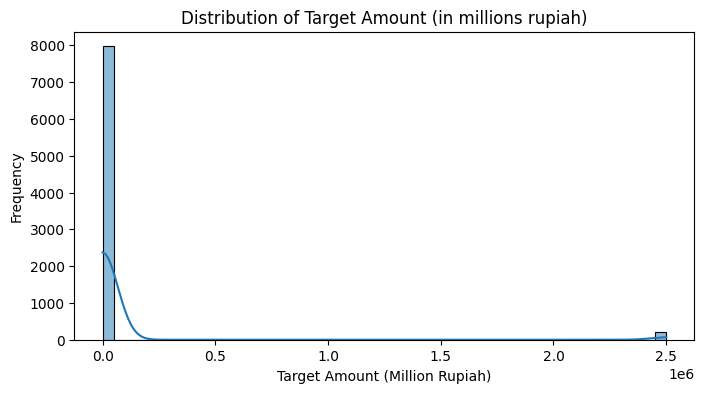

In [53]:
# 8. Skewness check for 'donations_target'
if 'donations_target' in df.columns:
    df['donations_target_million'] = df['donations_target'] / 1e6

    skew_value = skew(df['donations_target_million'].dropna())
    print(f"Skewness of target amount (in millions rupiah): {skew_value:.2f}")

    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df['donations_target_million'], bins=50, kde=True)
    plt.title('Distribution of Target Amount (in millions rupiah)')
    plt.xlabel('Target Amount (Million Rupiah)')
    plt.ylabel('Frequency')
    plt.show()


The distribution of donations_target is **right-skewed** (skewness > 0). This indicates that:

- Most campaigns set relatively low donation targets.
- A few campaigns request exceptionally high donations, creating a long tail on the right.
- Such skewness can introduce instability or bias in model training.

To address this, we apply a **logarithmic transformation** using `np.log1p()` to make the data more normally distributed and reduce the effect of outliers.

Skewness of collected amount (in millions rupiah): 28.40


/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


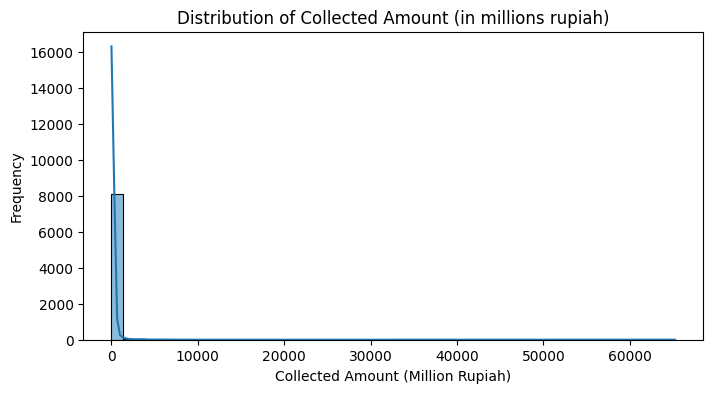

In [54]:
# 9. Skewness check for 'donations_collected'
if 'donations_collected' in df.columns:
    df['donations_collected_million'] = df['donations_collected'] / 1e6

    skew_value = skew(df['donations_collected_million'].dropna())
    print(f"Skewness of collected amount (in millions rupiah): {skew_value:.2f}")

    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df['donations_collected_million'], bins=50, kde=True)
    plt.title('Distribution of Collected Amount (in millions rupiah)')
    plt.xlabel('Collected Amount (Million Rupiah)')
    plt.ylabel('Frequency')
    plt.show()

The `donations_collected` variable shows a **right-skewed distribution**, which indicates that:

- Most crowdfunding projects receive relatively **low donation amounts**, typically clustered around the lower end of the scale.
- A **small number of projects receive disproportionately high donations**, which creates a long tail on the right side of the distribution.

This pattern is common in real-world donation or fundraising datasets, where a few highly successful campaigns dominate the total contributions.

We will consider applying a log transformation to this variable later in the preprocessing stage to reduce skewness and stabilize variance.


#### Outlier Consideration

In analyzing the donations_target and donations_collected features, I understand that such high-value campaigns are an **expected phenomenon** in the crowdfunding industry. They likely represent projects initiated by large organizations, hospitals, or media-backed efforts, which naturally attract higher donations. Removing them would distort the actual landscape of crowdfunding behavior in Indonesia. Thus, I retain them in the dataset and apply transformations (e.g. `log1p`) later during **preprocessing**.


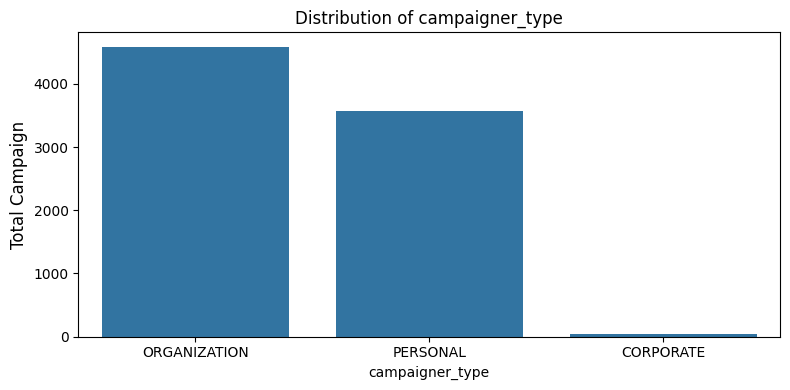

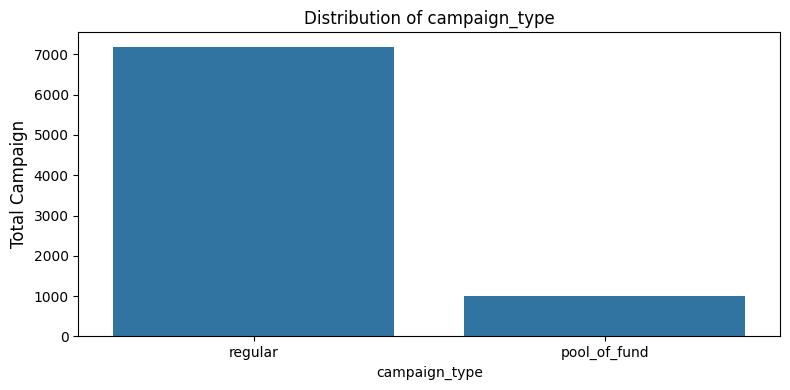

In [55]:
# 10. Visualize categorical features (1)
categorical_features = ['campaigner_type', 'campaign_type']

for col in categorical_features:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=0)
        plt.ylabel('Total Campaign', fontsize=12)
        plt.tight_layout()
        plt.show()

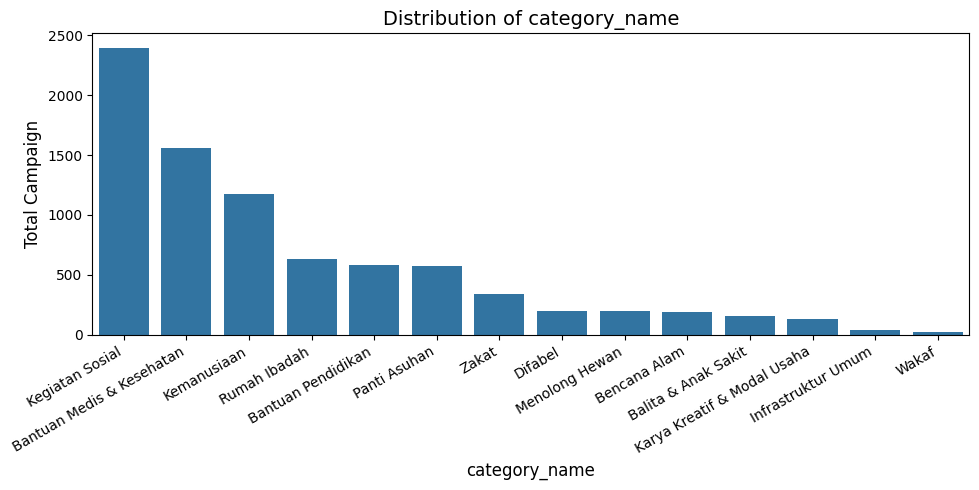

In [56]:
# 11. Visualize categorical features (2)
categorical_features = ['category_name']

for col in categorical_features:
    if col in df.columns:
        plt.figure(figsize=(10, 5))  # slightly wider
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Total Campaign', fontsize=12)
        plt.xticks(rotation=30, ha='right')  # tilt for readability
        plt.tight_layout()
        plt.show()


### Interpretation of Categorical Features Visualization


- Most crowdfunding projects are initiated by **organizations**, with the campaign type being **regular** —meaning the beneficiaries are clearly identified from the beginning, so donors know exactly who or what they're supporting.

- **Social activities, medical aid, and humanitarian** causes are the most dominant types of crowdfunding projects in Indonesia.

Category names are originally in Indonesian and will be translated in the preprocessing step for clarity in communication.

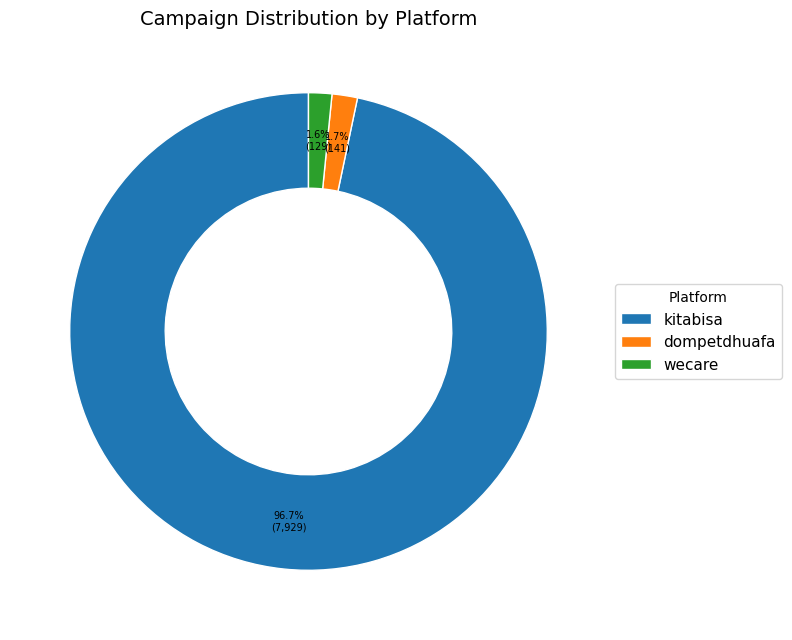

In [57]:
# 12. Campaign Distribution by Platform

# Total campaign by platform
source_counts = df['source'].value_counts()

# Customize color (blue, orange, green)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    source_counts,
    labels=None,
    colors=colors,
    autopct=lambda p: '{:.1f}%\n({:,})'.format(p, int(p * sum(source_counts) / 100)), # show % with 1 decimal + actual count in pie slices
    startangle=90, # rotate chart so it starts at 12 o’clock
    wedgeprops={'edgecolor': 'white', 'width': 0.4},  # donut chart
    pctdistance=0.8,       # distance of numbers to the center
    labeldistance=1.1      # distance of labels to the outside (if any)
)

# Percentage Formatting
for autotext in autotexts:
    autotext.set_fontsize(7)
    autotext.set_color('black')

# Platform legend
plt.legend(
    wedges,
    source_counts.index, #use category names as legends
    title="Platform",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=11
)

plt.title('Campaign Distribution by Platform', fontsize=14)
plt.tight_layout()
plt.show()

The chart indicates that Kitabisa hosts significantly more campaigns compared to others. This aligns with its position as one of the leading players in the crowdfunding industry, supported by a large user base. Other platforms, while hosting fewer campaigns, still represent specific market segments and contribute to the diversity of the dataset.

In [58]:
# 13. Check Datetime Features
datetime_col = 'expired'

# Check data type
print("Data type:", df[datetime_col].dtype)

# Convert to datetime if not already
df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')

# Check missing or invalid dates
print("Missing/Invalid dates:", df[datetime_col].isna().sum())

# Display min and max dates
print("Date range:")
print("Min:", df[datetime_col].min())
print("Max:", df[datetime_col].max())

Data type: datetime64[ns]
Missing/Invalid dates: 0
Date range:
Min: 2024-12-23 07:59:59
Max: 2038-01-19 03:14:07


There are still timestamp values present in the `expired` feature. These will be removed during the preprocessing step, as they are not needed for further analysis or modeling.


## Preprocessing

In [59]:
# 1. Drop unnamed/blank columns
# These blank columns appeared during scraping but contain no useful information.
# They are dropped to avoid noise in the dataset.
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.columns)

Index(['url', 'source', 'campaign_title', 'fundraiser_name', 'campaign_month',
       'days_remaining', 'donations_collected', 'donations_target',
       'category_name', 'open_goal', 'donation_percentage', 'forever_running',
       'campaigner_type', 'campaigner_badge', 'expired', 'request_userdata',
       'campaign_type', 'status', 'donations_target_million',
       'donations_collected_million'],
      dtype='object')


In [60]:
# 2. Remove The Time Portion
# Convert to datetime, then drop hours/minutes/seconds.
# This keeps only the date, which is sufficient for analysis while avoiding unnecessary timestamp granularity.

df['expired'] = pd.to_datetime(df['expired'], errors='coerce')

# Remove the time portion
df['expired'] = df['expired'].dt.date
print(df.expired)

0       2038-01-19
1       2038-01-19
2       2038-01-19
3       2038-01-19
4       2038-01-19
           ...    
8194    2025-01-15
8195    2025-01-15
8196    2025-01-15
8197    2025-01-15
8198    2025-01-15
Name: expired, Length: 8199, dtype: object


In [61]:
# 3. Create Percentage Column and Recode as Binary Target

# Convert 'status' into percentage format for interpretability
df['donation_percentage'] = df['status'] * 100

# Recode 'status' into binary target: 1 if campaign met/exceeded target, 0 otherwise
df['status'] = df['donation_percentage'].apply(lambda x: 1 if x >= 100 else 0)

# Check results
print(df[['donation_percentage', 'status']].head())

   donation_percentage  status
0             2.596530       0
1             2.046874       0
2            36.667310       0
3             1.175465       0
4             0.549453       0


The status feature originally represented the ratio between collected donations and the fundraising target.
I first converted it into donation_percentage (e.g., 150% means a campaign raised 1.5× its target) to retain interpretability for EDA.
Then, I recoded status into a binary target (1 = success, 0 = failure), which is more suitable for classification tasks.

In [62]:
# 5. Filter Out Unfunded and Future-Expired Projects
df['expired'] = pd.to_datetime(df['expired'], errors='coerce')
df = df.dropna(subset=['expired'])  # If there is any NaT
df['status'] = df['status'].astype(int)  # If there is any string

cutoff_date = pd.Timestamp('2025-01-15')
df = df[~((df['status'] == 0) & (df['expired'] > cutoff_date))]


I removed two types of data:

1. **Projects that haven't collected any funds** — These campaigns likely had low visibility or engagement, offering little value for modeling; and
2. **Expired projects after 15th January 2025** — Projects with expiration dates after January 15, 2025 were excluded because they were still active at the time of data collection, and thus their final fundraising status was unknown. Since the supervised learning approach requires complete target labels, only completed campaigns were retained.


In [63]:
# 6. Check Observations
observations_df = len(df)
print(f"Number of Campaigns: {observations_df}")

Number of Campaigns: 2459


In [64]:
# 7. Check Status
success_project = df['status'].value_counts()

# Check percentage
success_project_rate = df['status'].value_counts(normalize=True) * 100

# Create tabel
tabel_success_project = pd.DataFrame({
    'Total': success_project,
    'Percentage': success_project_rate.round(2)
})

# View tabel
print(tabel_success_project) # there's imbalance

        Total  Percentage
status                   
0        2247       91.38
1         212        8.62


In this project, a campaign is considered successful only if it reaches 100% of its donation target.
This strict definition ensures clarity, aligns with the platform’s official KPI, and allows direct mapping of model outputs to actual business outcomes. While alternative thresholds (e.g., ≥90%) could capture near-successful campaigns, they are excluded here to maintain a consistent and objective target for evaluation.

-------
Note on Class Imbalance  

The dataset exhibits a clear class imbalance, which aligns with the business context — most crowdfunding campaigns do not reach their donation targets. Only **8.6%** of campaigns are successful (`status=1`), while **91.4%** are unsuccessful (`status=0`).  

This imbalance can bias models toward always predicting the majority class.  
In particular, it increases the risk of generating **false positives**, which is the main error type to minimize for this project.  

> Solutions to this challenge will be applied during model development.



In [65]:
# 8. Cross tabulation campain status by campaigner type
# Cross tab for reporting
cross_tab = pd.crosstab(df['campaigner_type'], df['status'])
cross_tab_pct = pd.crosstab(df['campaigner_type'], df['status'], normalize='index') * 100

# Combine "Count (Percentage%)"
final_table = cross_tab.astype(str) + " (" + cross_tab_pct.round(2).astype(str) + "%)"

# Display table with title and note
print("Campaign Status by Campaigner Type")
print("(Count and Percentage per Row)\n")
print(final_table)
print("\nNote: The percentages are calculated within each campaigner type category.")


Campaign Status by Campaigner Type
(Count and Percentage per Row)

status                       0             1
campaigner_type                             
CORPORATE             0 (0.0%)    7 (100.0%)
ORGANIZATION     1288 (93.13%)    95 (6.87%)
PERSONAL          959 (89.71%)  110 (10.29%)

Note: The percentages are calculated within each campaigner type category.


There are only a few crowdfunding projects initiated by corporations (such as fintech company); however, all of them have successfully achieved their donation targets. Crowdfunding platforms could engage in bilateral discussions with these corporations to learn how they promote their campaigns and explore ways to adapt these strategies for the platforms.

In [66]:
# 9. Translate `category_name` From Indonesian To English
category_translation = {
    'Balita & Anak Sakit': 'Sick Children',
    'Bantuan Medis & Kesehatan': 'Medical & Health Aid',
    'Bencana Alam': 'Natural Disaster',
    'Bantuan Pendidikan': 'Educational Aid',
    'Difabel': 'Disabilities',
    'Infrastruktur Umum': 'Public Infrastructure',
    'Karya Kreatif & Modal Usaha': 'Creative Works & Business Capital',
    'Kegiatan Sosial': 'Social Activities',
    'Kemanusiaan': 'Humanitarian',
    'Menolong Hewan': 'Animal Rescue',
    'Panti Asuhan': 'Orphanage',
    'Rumah Ibadah': 'Place of Worship',
    'Wakaf': 'Waqf',
    'Zakat': 'Zakat',
}

df['category_name_en'] = df['category_name'].map(category_translation)

print(df.category_name_en)

14                     Zakat
16                     Zakat
25                     Zakat
28                     Zakat
34                     Zakat
                ...         
8194            Humanitarian
8195            Humanitarian
8196    Medical & Health Aid
8197    Medical & Health Aid
8198    Medical & Health Aid
Name: category_name_en, Length: 2459, dtype: object


### Context: Zakat and Waqf

- **Zakat**: A form of *mandatory almsgiving* in Islam, usually calculated as a fixed percentage of wealth or income. It functions as a social safety net to support the poor and vulnerable.  
- **Waqf**: A form of *Islamic endowment*, where individuals donate assets (such as land, property, or funds) for perpetual charitable purposes, e.g., education, healthcare, or public welfare.  

Both concepts play a central role in Islamic philanthropy and are common in crowdfunding platforms for social and religious causes.


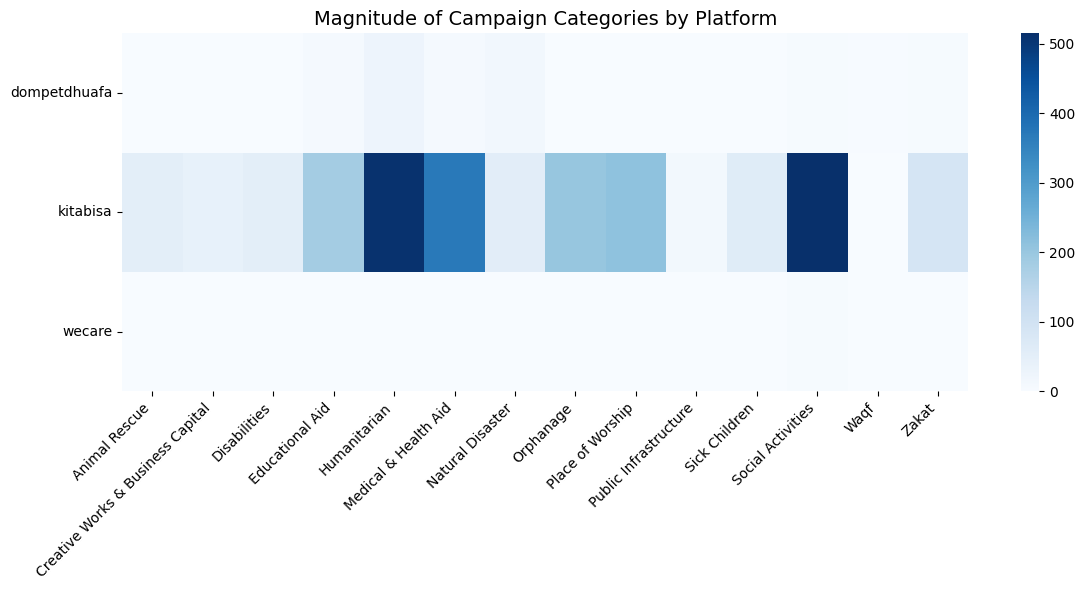

In [67]:
# 10. Campaign Category Magnitude Based on Platforms
# Calculate frequency
count_df = df.groupby(['source', 'category_name_en']).size().reset_index(name='count')

# Pivot table for heatmap
pivot_df = count_df.pivot(index='source', columns='category_name_en', values='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_df,
    annot=False,      # showing value in cell
    fmt='.0f',        # number format
    cmap='Blues'      # darker color indicates higher value
)

plt.title('Magnitude of Campaign Categories by Platform', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the magnitude of campaigns across platforms, there are diverse crowdfunding contexts within the ecosystem. The high saturation on Kitabisa.com indicates that it is the leading choice for fundraisers. The large share of humanitarian and social activities campaigns may signal to the government the public’s needs, and could also suggest to the platform that these categories deserve increased promotional focus.

/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


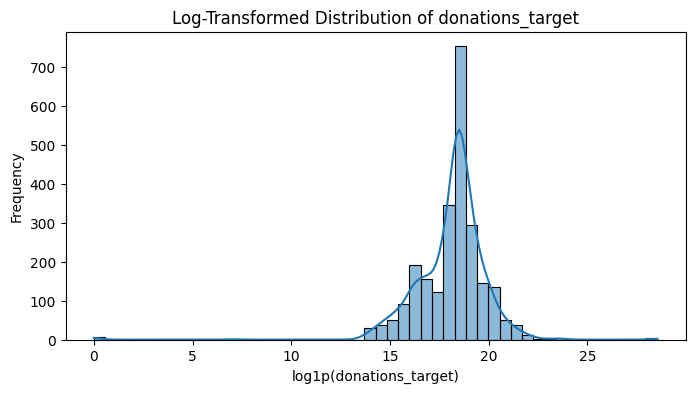

In [68]:
# 11. Transform `donations_target` To Log Form
df['log_donations_target'] = np.log1p(df['donations_target'])

plt.figure(figsize=(8, 4))
sns.histplot(df['log_donations_target'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of donations_target')
plt.xlabel('log1p(donations_target)')
plt.ylabel('Frequency')
plt.show()


/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


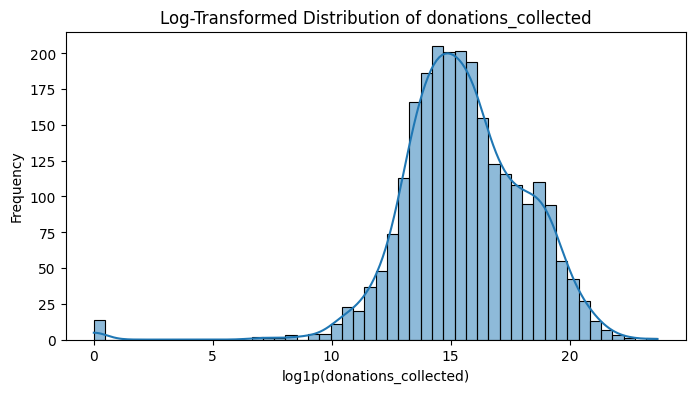

In [69]:
# 12. Transform `donations_collected` To Log Form
df['log_donations_collected'] = np.log1p(df['donations_collected'])

plt.figure(figsize=(8, 4))
sns.histplot(df['log_donations_collected'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of donations_collected')
plt.xlabel('log1p(donations_collected)')
plt.ylabel('Frequency')
plt.show()


#### Post-transformation Insight

After the log transformation, the distribution becomes more symmetrical. This will help improve the performance of many machine learning models that assume linearity or normality in the input features.


> Encoding Note:
>
> Categorical features such as `platform`, `campaigner_type`, and `campaign_type` are retained in their original form for now.  
> One Hot Encoding will be applied later using appropriate techniques for each model during the pipeline phase.


## Train Test Split

In [70]:
# 1. Define Features and Target

X = df[['source', 'category_name_en', 'campaign_type', 'log_donations_target','forever_running']]
y = df['status']

In [71]:
# 2.Train-Test Split

# Stratify to maintain the class distribution (important for imbalanced binary classification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Quick check
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Class balance in train:", y_train.value_counts(normalize=True))
print("Class balance in test :", y_test.value_counts(normalize=True))


Train size: (1967, 5)
Test size: (492, 5)
Class balance in train: status
0    0.913574
1    0.086426
Name: proportion, dtype: float64
Class balance in test : status
0    0.914634
1    0.085366
Name: proportion, dtype: float64


I adopted an 80:20 train-test split because this ratio is among the most widely used in the literature. According to Vrigazova (2021) and Tan et al. (2021), both 70:30 and 80:20 splits provide a good balance between training and testing data, ensuring sufficient information for model learning while maintaining enough data to evaluate generalization performance. This makes the 80:20 split a robust and reliable choice across various contexts.

Source:
- https://sciendo.com/article/10.2478/bsrj-2021-0015
- https://arxiv.org/abs/2106.04525

## Pre-Processing Pipeline

In [72]:
# 1. Check Categorical Variables To Be Encoded
check = X_train.select_dtypes(include='object').columns.tolist()
print(check)

['source', 'category_name_en', 'campaign_type']


In [73]:
# 2. Checking forever_running Data Type
X_train['forever_running'] = X_train['forever_running'].astype(int)
X_train.dtypes['forever_running']

dtype('int64')

In [74]:
# 3. Define Feature Types
categorical_cols = ['source', 'category_name_en', 'campaign_type']
binary_cols = ['forever_running']
numerical_cols = ['log_donations_target']

In [75]:
# 4. Preprocessing Pipeline for Logistic Regression

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # standardize numerical features
        ('binary', 'passthrough', binary_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Fit-transform the training set
X_train_lr = preprocessor_lr.fit_transform(X_train)

# Transform the test set
X_test_lr = preprocessor_lr.transform(X_test)


### Note on Preprocessing Pipeline for Logistic Regression

To keep the workflow clean and reproducible, I used a **ColumnTransformer** within a preprocessing pipeline:  

- **Numerical features** → standardized using StandardScaler to help the model converge faster, remain stable, and avoid bias from features with larger scales
- **Binary features** → also passed through as they are already encoded (0/1).  
- **Categorical features** → transformed with **One-Hot Encoding** (convert categories into binary columns), with `handle_unknown='ignore'` to safely handle unseen categories in the test set.  

This setup ensures that the exact same transformations are applied consistently to both the training and test sets. It also makes the model more production-ready, since all preprocessing steps are bundled into one pipeline instead of being scattered across the notebook.


In [76]:
# 5. Preprocessing Pipeline for Random Forest and XGBoost

# Copy X_train and X_test To Prevent Interference With Other Pipelines
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()

# Define Categorical and Binary Columns
categorical_cols_tree = ['source', 'category_name_en', 'campaign_type']
binary_cols_tree = ['forever_running']

# Create ColumnTransformer using OneHotEncoder
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='error'), categorical_cols_tree),
        ('bin', 'passthrough', binary_cols_tree)
    ],
    remainder='passthrough'
)

# Fit and Transform Data
X_train_tree_final = preprocessor_tree.fit_transform(X_train_tree)
X_test_tree_final = preprocessor_tree.transform(X_test_tree)

# Convert to Dense Array (because OneHotEncoder result is sparse)
X_train_tree_final = X_train_tree_final.toarray()
X_test_tree_final = X_test_tree_final.toarray()

# Get Feature Names Directly From ColumnTransformer
feature_names_tree = preprocessor_tree.get_feature_names_out()

# Create Encoding Result DataFrame
X_train_tree_df = pd.DataFrame(
    X_train_tree_final,
    columns=feature_names_tree,
    index=X_train_tree.index
)

X_test_tree_df = pd.DataFrame(
    X_test_tree_final,
    columns=feature_names_tree,
    index=X_test_tree.index
)

#### Note on Preprocessing for Random Forest and XGBoost  

Unlike Logistic Regression (which requires numerical input only), tree-based models such as **Random Forest** and **XGBoost** can directly handle mixed feature types with less preprocessing.  

Here’s how I prepared the data for these models:  

- **Categorical features** (`source`, `category_name_en`, `campaign_type`) → transformed using **One-Hot Encoding**.  
- **Binary features** (`forever_running`) → kept as they are (0/1).  
- **Numerical features** → passed through unchanged.  

Because `OneHotEncoder` produces a **sparse matrix**, I converted the result to a **dense array** and wrapped it in a DataFrame with feature names. This makes it easier to inspect, debug, and interpret feature importance later.  

This pipeline ensures consistent preprocessing between train and test data, while also making feature engineering transparent for analysis and future deployment.


In [77]:
# 6. Sanity Check: Print Key Preprocessing Information

print("Categorical cols tree:", categorical_cols_tree)
print("Binary cols tree:", binary_cols_tree)
print("Shape after transform (train):", X_train_tree_final.shape)
print("Shape after transform (test):", X_test_tree_final.shape)
print("Feature names length:", len(feature_names_tree))

Categorical cols tree: ['source', 'category_name_en', 'campaign_type']
Binary cols tree: ['forever_running']
Shape after transform (train): (1967, 21)
Shape after transform (test): (492, 21)
Feature names length: 21


These print statements serve as a preprocessing validation step. They confirm which columns were encoded, which were passed through, and the final dimensionality of the transformed dataset.

In [78]:
# 7. Checking The Encoding Result (OneHotEncoder version)

# Get OneHotEncoder from preprocessor
encoder = preprocessor_tree.named_transformers_['cat']

# Transform category coulumn
X_train_tree_ohe = encoder.transform(X_train_tree[categorical_cols_tree])

# Convert to dense array
X_train_tree_ohe = X_train_tree_ohe.toarray()

# Get feature names from OHE
ohe_feature_names = encoder.get_feature_names_out(categorical_cols_tree)

# Create DataFrame  
X_train_tree_ohe_df = pd.DataFrame(
    X_train_tree_ohe,
    columns=ohe_feature_names,
    index=X_train_tree.index
)

# Print the result of 'category_name_en'
print("\n=== Encoded Result Sample for 'category_name_en' (first 10 rows) ===")
print(X_train_tree_ohe_df.filter(like="category_name_en").head(10))

# Compare with original
print("\n=== Original Value Sample (first 10 rows) ===")
print(X_train_tree['category_name_en'].head(10).to_string(index=False))




=== Encoded Result Sample for 'category_name_en' (first 10 rows) ===
      category_name_en_Animal Rescue  \
2482                             0.0   
6084                             0.0   
1458                             0.0   
2117                             0.0   
4523                             0.0   
2574                             0.0   
5991                             0.0   
5274                             0.0   
7274                             0.0   
5842                             0.0   

      category_name_en_Creative Works & Business Capital  \
2482                                                0.0    
6084                                                0.0    
1458                                                0.0    
2117                                                0.0    
4523                                                0.0    
2574                                                0.0    
5991                                                0.0    
5274     

We retrieve the OneHotEncoder from the preprocessing pipeline and transform the categorical columns into a DataFrame with proper column names.
Print categories per column to see the mapping from original values to one-hot columns.
Inspect a sample of encoded values for category_name_en and compare with the original data to verify correctness.

In [79]:
# 8. Extract Target Variable
y = df['status']

## Modeling

### Creating Baseline Model

#### Logistic Regression

In [80]:
# 1. Train and Predict With Logistic Regression Model

# Train Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Fit model to training data
model_lr.fit(X_train_lr, y_train)

# Predict on test data
y_pred_lr = model_lr.predict(X_test_lr)

In [81]:
# 2. Logistic Regression Evaluation: Classification report and ROC AUC
print("Logistic Regression Evaluation:")

# Display precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred_lr))

# Display ROC AUC score using predicted probabilities
print("ROC AUC:", roc_auc_score(y_test, model_lr.predict_proba(X_test_lr)[:, 1]))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.79      0.88        42

    accuracy                           0.98       492
   macro avg       0.99      0.89      0.94       492
weighted avg       0.98      0.98      0.98       492

ROC AUC: 0.9178042328042328


Evaluation Metrics

- Precision: proportion of predicted positives that are actually positive. Important here because we want to minimize false positives.

- Recall: proportion of actual positives correctly identified.

- F1-score: harmonic mean of precision and recall.

- ROC AUC: measures overall ability to distinguish between classes, independent of threshold.

- Classification report interpretation

Model shows strong performance on the majority class but underdetects the minority class. Although precision is high for both classes, the recall for class 1 (0.79) suggests that some positive cases are missed. Logistic Regression is a linear model, and may not be the best fit if the relationship between features and the target variable is non-linear or involves complex interactions.

- ROC AUC interpretation

The model can distinguish between the positive and negative classes with 0.92 effectiveness, considering all possible classification thresholds

#### Random Forest

In [82]:
# 3. Train and Predict With Random Forest

# Train Random Forest Model
model_rf = RandomForestClassifier(random_state=42)

# Fit model to training data
model_rf.fit(X_train_tree_final, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test_tree_final)

In [83]:
# Predict class probabilities for class 1 (positive class)
y_proba_rf = model_rf.predict_proba(X_test_tree_final)[:, 1]

# Apply custom threshold (e.g., 0.65) to convert probabilities into binary predictions
# Increase threshold to 0.65 to reduce false positives and improve precision
y_pred_rf_thresh = (y_proba_rf >= 0.65).astype(int)

In [84]:
# 4. Random Forest Evaluation: Classification report and ROC AUC

# Display precision, recall, f1-score, and support for each class
print("Random Forest with Threshold 0.65")
print(confusion_matrix(y_test, y_pred_rf_thresh))
print(classification_report(y_test, y_pred_rf_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest with Threshold 0.65
[[450   0]
 [  8  34]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.81      0.89        42

    accuracy                           0.98       492
   macro avg       0.99      0.90      0.94       492
weighted avg       0.98      0.98      0.98       492

ROC AUC: 0.9459259259259258


I decided to use domain-driven thresholding instead of a purely statistical approach (e.g., Youden’s J). In crowdfunding, false positives are particularly costly: when the platform promotes a campaign that ultimately fails, it wastes marketing resources and risks damaging both fundraiser trust and the platform’s brand reputation.  
By raising the threshold to 0.65, the model becomes stricter in classifying “successful” campaigns, reducing false positives and ensuring that only the most promising campaigns receive additional support.  


- Classification report interpretation

The model achieves perfect precision for the positive class (1.00) and high recall (0.81), indicating it rarely predicts false positives but misses a small portion of actual positives.

- ROC AUC interpretation

The high ROC AUC (0.95) confirms strong overall discriminative ability, with balanced performance across both classes despite the imbalanced data.



#### XGBoost

In [85]:
# 5. Train and Predict With Boosted Trees (XGBoost)

# Train XGBoost Model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit model to training data
model_xgb.fit(X_train_tree_final, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test_tree_final)

/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:17:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [86]:
# Predict class probabilities for class 1 (positive class)
y_proba_xgb = model_xgb.predict_proba(X_test_tree_final)[:, 1]

# Apply custom threshold (e.g., 0.65) to convert probabilities into binary predictions
# Increase threshold to 0.65 to reduce false positives and improve precision
y_pred_xgb_thresh = (y_proba_xgb >= 0.65).astype(int)

In [87]:
# 6. XGBoost Evaluation: Classification report and ROC AUC

print("XGBoost with Threshold 0.65")
print(confusion_matrix(y_test, y_pred_xgb_thresh))
print(classification_report(y_test, y_pred_xgb_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

XGBoost with Threshold 0.65
[[450   0]
 [  9  33]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.79      0.88        42

    accuracy                           0.98       492
   macro avg       0.99      0.89      0.94       492
weighted avg       0.98      0.98      0.98       492

ROC AUC: 0.9514814814814814


- Classification Report Interpretation

The model shows excellent performance on Class 0 with perfect recall (1.00) and high precision (0.98), meaning it captures all true negatives with minimal false alarms.

For Class 1, precision is perfect (1.00), but recall is lower (0.79), indicating the model is conservative in flagging positives—avoiding false positives but missing some actual positives.

- ROC AUC Interpretation

The ROC AUC score of 0.95 reflects strong overall ability to distinguish between the two classes, even across varying classification thresholds.


### Parameter Tuning

I decided to use Randomized Search CV for hyperparameter tuning. It efficiently explores a wide range of hyperparameter combinations, making it much faster than Grid Search while still likely to find near-optimal values. This is suitable for my dataset size and computational resources.
For reference, Grid Search CV is more comprehensive but slower, and Optuna is ideal for large datasets or more complex models because it intelligently searches the hyperparameter space and often finds the best results with fewer evaluations.

Linear Regression was tested as a baseline model. However, it showed the lowest performance (accuracy = 0.92) and is limited in capturing non-linear patterns in the data. Therefore, it was not included in hyperparameter tuning.

In [88]:
# 1. Parameter Tuning For Random Forest

# Add Preprocessing and Model to the Pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define Hyperparameter Space
param_dist_rf = {
    'clf__n_estimators': [100, 200, 300, 500],
    'clf__max_depth': [4, 6, 8, 10, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None],
    'clf__class_weight': [None, 'balanced']
}

# F1 macro scorer
scorer = make_scorer(f1_score, average='macro')

# Randomized Search CV (more efficient than Grid Search)
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=50,          # number of sampled parameter settings
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Get the best estimator (the best Random Forest model found)
best_rf = random_search_rf.best_estimator_

# Print best parameters
print("Best RF Params:", random_search_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best RF Params: {'clf__n_estimators': 500, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': 'log2', 'clf__max_depth': 10, 'clf__class_weight': None}


Random Forest hyperparameters were optimized using Random Search CV. The best configuration found was 500 trees (n_estimators=500) with a maximum depth of 10 (max_depth=10), a minimum of 10 samples required to split a node (min_samples_split=10), and log2 features considered per split (max_features='log2'). This configuration balances bias and variance, helping the model generalize well on unseen data.

In [89]:
# **Train Set**
y_proba_train = best_rf.predict_proba(X_train)[:, 1]
## y_pred_train = best_rf.predict(X_train) --default threshold

thresh = 0.65
y_pred_train = (y_proba_train >= thresh).astype(int)

print("\n    Train Set at Threshold 0.65 ")
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))
print("ROC AUC Score (Train):", roc_auc_score(y_train, y_proba_train))

# **Test Set**
y_proba_test = random_search_rf.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_test_thresh = (y_proba_test >= thresh).astype(int)

print(f"\n  Test Set at Threshold {thresh} ")
print("Classification Report:\n", classification_report(y_test, y_pred_test_thresh))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_proba_test))


    Train Set at Threshold 0.65 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1797
           1       0.97      0.75      0.85       170

    accuracy                           0.98      1967
   macro avg       0.97      0.88      0.92      1967
weighted avg       0.98      0.98      0.98      1967

ROC AUC Score (Train): 0.9894988379325018

  Test Set at Threshold 0.65 
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.79      0.88        42

    accuracy                           0.98       492
   macro avg       0.99      0.89      0.94       492
weighted avg       0.98      0.98      0.98       492

ROC AUC Score (Test): 0.9404232804232804


The Random Forest model shows strong performance (Train AUC = 0.98, Test AUC = 0.94) with no major signs of overfitting. Class 0 is predicted almost perfectly, while for Class 1 the model achieves precision = 1.00 and recall = 0.79 at threshold 0.65. This means the model is highly conservative: it avoids false positives entirely but misses some true positives. The threshold choice can be adjusted depending on whether the business goal prioritizes minimizing false positives or capturing more true positives.

In [90]:
# 2. Parameter Tuning For XGBoost

# Calculating scale_pos_weight For Class Imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Pipeline XGB
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# Hyperparameter Space
param_dist_xgb = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__gamma': [0, 0.1, 0.3, 0.5],
    'clf__scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5]
}

# Tuning
random_search_xgb = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit
random_search_xgb.fit(X_train, y_train)

# Get the best estimator (the best XGB model found)
best_xgb = random_search_xgb.best_estimator_

# Print best parameters
print("Best XGB Params:", random_search_xgb.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:17:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:17:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:17:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ratughifa/Documents/Personal Project/islam

Best XGB Params: {'clf__subsample': 1.0, 'clf__scale_pos_weight': 1, 'clf__n_estimators': 200, 'clf__max_depth': 7, 'clf__learning_rate': 0.2, 'clf__gamma': 0.5, 'clf__colsample_bytree': 0.6}


/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ratughifa/Documents/Personal Project/islamic crowdfunding campaign/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ratughifa/Documents/Personal Project/islam

XGBoost hyperparameters were optimized using Randomized Search CV. The best configuration uses 200 trees (n_estimators=200) with a maximum depth of 9 (max_depth=9), a learning rate of 0.01 (learning_rate=0.01), and subsample=0.8 to reduce overfitting. Other parameters like gamma=0.5 and colsample_bytree=1.0 control tree pruning and feature sampling. scale_pos_weight=1 balances the class distribution. This setup aims to maximize predictive performance while keeping overfitting in check.

In [91]:
# Train Set Evaluation
# y_pred_xgb = random_search_xgb.best_estimator_.predict(X_train) --default threshold
y_proba_xgb = random_search_xgb.best_estimator_.predict_proba(X_train)[:, 1]

thresh = 0.65
y_pred_xgb = (y_proba_xgb >= thresh).astype(int)

print("\n    Train Set Performance at Threshold 0.65")
print(classification_report(y_train, y_pred_xgb))
print(" ROC AUC Score (Train):", roc_auc_score(y_train, y_proba_xgb))

# Test Set Evaluation
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)
y_proba_xgb = random_search_xgb.best_estimator_.predict_proba(X_test)[:, 1]

print(f"\n  Test Set at Threshold {thresh} ")
print(classification_report(y_test, y_pred_xgb))
print(" ROC AUC Score (Test):", roc_auc_score(y_test, y_proba_xgb))


    Train Set Performance at Threshold 0.65
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1797
           1       0.96      0.74      0.84       170

    accuracy                           0.98      1967
   macro avg       0.97      0.87      0.91      1967
weighted avg       0.97      0.98      0.97      1967

 ROC AUC Score (Train): 0.9712674719303414

  Test Set at Threshold 0.65 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.79      0.88        42

    accuracy                           0.98       492
   macro avg       0.99      0.89      0.94       492
weighted avg       0.98      0.98      0.98       492

 ROC AUC Score (Test): 0.947089947089947


The XGBoost model shows strong performance (Train AUC = 0.97, Test AUC = 0.95) with no major signs of overfitting. Class 0 is predicted almost perfectly, while for Class 1 the model achieves precision = 1.00 and recall = 0.79 at threshold 0.65. This means the model is highly conservative: it avoids false positives entirely but misses some true positives. The threshold choice can be adjusted depending on whether the business goal prioritizes minimizing false positives or capturing more true positives.

### SHAP (SHapley Additive exPlanations) values

Machine learning models like Random Forest or XGBoost often work as “black boxes.” They can predict well, but it’s not always clear why. SHAP helps open up that box by showing which features matter most, and whether they push predictions higher or lower.  

By looking at SHAP’s global feature importance, I can go beyond just reporting accuracy and ROC-AUC, and actually explain which factors generally drive campaign success or failure. This makes the model more transparent and the insights more useful for understanding crowdfunding dynamics.


/var/folders/1b/9cl85s01177c7dclv0w0g9r80000gn/T/ipykernel_16338/1262677035.py:32: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_grouped = shap_df.groupby(level=0, axis=1).sum()


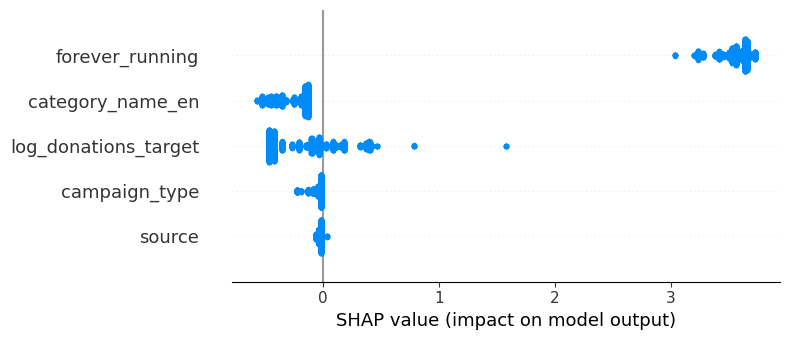

In [92]:
# 1. Get model and SHAP values
xgb_model = best_xgb.named_steps["clf"]
X_train_preprocessed = preprocessor_tree.transform(X_train_tree)
X_train_preprocessed = (
    X_train_preprocessed.toarray()
    if hasattr(X_train_preprocessed, "toarray")
    else X_train_preprocessed
)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_preprocessed)

feature_names = preprocessor_tree.get_feature_names_out()

# 2. Build feature mapping from OneHotEncoder
encoder = preprocessor_tree.named_transformers_['cat']

# 3. Create mapping from dummy → original feature
mapping = {}
for col_name, categories in zip(categorical_cols_tree, encoder.categories_):
    for cat in categories:
        mapping[f"cat__{col_name}_{cat}"] = col_name

# 4. For numeric/passthrough features, just keep the name
for name in feature_names:
    if name not in mapping:
        mapping[name] = name.split("__")[-1]

# 5. Apply mapping and group
shap_df = pd.DataFrame(shap_values, columns=feature_names)
shap_df = shap_df.rename(columns=mapping)
shap_grouped = shap_df.groupby(level=0, axis=1).sum()

# 6.Plot grouped SHAP summary
shap.summary_plot(shap_grouped.values, feature_names=shap_grouped.columns)


#### SHAP Global Feature Importance — Interpretation

1. Forever running
- **Definition**: `1` = campaign always open to receive donations; `0` = campaign has a fixed deadline.  
- **SHAP result**: Strong **positive values** for `forever running=1`.  
- **Interpretation**: Campaigns that remain perpetually active greatly **increase the probability of donation target success**.  
- **Domain sense**: No deadline = more time to accumulate donations.
---

2. Category name
- **SHAP result**: Negative tendency.
- **Interpretation**: Some categories tend to lower the probability of success (negative SHAP values dominate). The model has learned that certain campaign types are less attractive to donors.
- **Domain sense**: Some campaign themes may not resonate as much with donors (e.g., niche or less emotionally compelling causes)
---

3. Log target (Donation goal)
- **SHAP result**: Wide spread of points from negative to positive.
- **Interpretation**: The SHAP values are widely spread both positive and negative, meaning the impact of donation goals is highly context-dependent. For some campaigns, a higher target discourages donors (negative impact), while in others, a clear and ambitious target can signal trust and credibility (positive impact).
- **Domain sense**: In real fundraising, modest goals may seem easier to achieve, but sometimes large, well-justified goals motivate donors to contribute to something big.
---

4. Campaign type
- **SHAP result**: Slight negative bias, minimal overall impact.
- **Interpretation**: Shows a slight negative bias, but overall close to zero. This means the model doesn’t consider campaign type (e.g., pool vs. regular) a strong predictor.
- **Domain sense**: Donors focus more on the cause, story, and urgency than on whether the funds are pooled or distributed individually.
---

5. Source (Platform)
- **SHAP result**: Very tight cluster near zero, negligible impact. 
- **Interpretation**: Clustered very tightly near zero → essentially no predictive power. The platform itself doesn’t matter much for campaign success, at least in this dataset.
- **Domain sense**: Most donors may not distinguish strongly between platforms, as long as they trust the campaigner and cause.



### Save Best Model

Both Random Forest and XGBoost perform well for predicting campaign success. Random Forest achieves accuracy 0.98 and ROC AUC 0.941, while XGBoost reaches the same accuracy but a slightly higher ROC AUC of 0.948.
I chose XGBoost because it has slightly better predictive power, handles feature interactions more effectively, and remains interpretable through feature importance and SHAP values. This makes it suitable for making reliable, resource-sensitive predictions in social crowdfunding campaigns.

In [93]:
import joblib
joblib.dump(best_xgb, 'xgb_best_model.pkl')


['xgb_best_model.pkl']

## Crowdfunding Promotion Cost Analysis

In a donation-based crowdfunding platform, promoting the right campaign is critical — not only to maximize social impact but also to ensure efficient use of limited resources.

This section estimates the potential **financial cost of misclassification** by the machine learning model, using two key types of errors:

### 1. False Positives (FP)  
- **What it means:** The model predicts a campaign will succeed, but in reality, it fails.  
- **Impact on fundraiser:** The fundraiser may invest in paid social media ads (e.g., Instagram, Facebook, TikTok), expecting a return through donations. When the campaign fails, this ad budget is wasted.  
- **Impact on platform:** Homepage or curation resources are spent on campaigns that do not perform well, which could have been allocated to more promising ones.

### 2. False Negatives (FN)  
- **What it means:** The model predicts a campaign will fail, but it actually succeeds.  
- **Impact on fundraiser:** The campaign might not be promoted, leading to lower visibility and potentially reduced donations.  
- **Impact on platform:** By not promoting this campaign, the platform misses out on operational fees (e.g., 5% of the total donation), which are collected from all transactions regardless of campaign success.  


In [94]:
# 1. Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_thresh)

# Value of Confusion Matrix
TN, FP, FN, TP = cm.ravel()

# Result
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

false_positives_count = FP
false_negatives_count = FN


False Positives (FP): 0
False Negatives (FN): 9


In [95]:
# 2. Fetch live USD->IDR rate safely (Frankfurter API, no API key needed)
def get_usd_idr_rate() -> float:
    url = "https://api.frankfurter.app/latest?from=USD&to=IDR"
    resp = requests.get(url, timeout=10)
    resp.raise_for_status()
    data = resp.json()
    return data["rates"]["IDR"]

USD_TO_IDR = get_usd_idr_rate()
print(f"Current exchange rate: 1 USD = Rp{USD_TO_IDR:,.2f}")

# --- Business inputs ---
TOTAL_CAMPAIGNS = 2048
EXPECTED_CLICKS = 200 #assumption
OPR_FEE = 0.05
# Calculate avg_success_donation
successful_campaigns = df[df['status'] == 1]

if not successful_campaigns.empty:
    avg_success_donation = successful_campaigns['donations_collected'].mean()
else:
    # Fallback default if no successful campaigns exist
    avg_success_donation = 250_000.0

print(f"Average donation per successful campaign: Rp{avg_success_donation:,.0f}")


INCLUDE_FN = False  # It is FP analysis only

# 3. CPC scenarios, convert USD→IDR using live rate
# The actual CPC cost can vary significantly
CPC_USD = {
    "fb_low": 0.30,
    "fb_mid": np.median([0.30, 4.00]),   # Median FB CPC range
    "fb_high": 4.00,

    "tiktok_low": 0.17,
    "tiktok_mid": np.median([0.17, 1.00]),
    "tiktok_high": 1.00,

    "insta_low": 1.01,
    "insta_mid": np.median([1.01, 1.73]),
    "insta_high": 1.73,

    "gads_low": 1.00,
    "gads_mid": np.median([1.00, 2.00]),
    "gads_high": 2.00,
}
CPC_IDR = {k: v * USD_TO_IDR for k, v in CPC_USD.items()}

# 4. Scenario evaluation
@dataclass
class Scenario:
    name: str
    ad_cost_per_campaign: float
    savings_if_fp0: float

results: List[Scenario] = []
for name, cpc in CPC_IDR.items():
    ad_cost = cpc * EXPECTED_CLICKS
    saving = FP * ad_cost
    results.append(Scenario(name, ad_cost, saving))

# 5. Sort by cost
results.sort(key=lambda x: x.ad_cost_per_campaign)

# 6. Print summary
print("\n--- Campaign Efficiency Analysis---")
for s in results:
    print(f"{s.name:12s}: Ad cost/campaign = Rp{s.ad_cost_per_campaign:,.0f}; "
          f"Saving if FP=0: Rp{s.savings_if_fp0:,.0f}")

# 7. Headline narrative
perf = results[0]
headline = (
    f"\nNote: Current USD→IDR rate is Rp{USD_TO_IDR:,.0f}. "
)
print(headline)



Current exchange rate: 1 USD = Rp16,475.00
Average donation per successful campaign: Rp392,131,475

--- Campaign Efficiency Analysis---
tiktok_low  : Ad cost/campaign = Rp560,150; Saving if FP=0: Rp0
fb_low      : Ad cost/campaign = Rp988,500; Saving if FP=0: Rp0
tiktok_mid  : Ad cost/campaign = Rp1,927,575; Saving if FP=0: Rp0
tiktok_high : Ad cost/campaign = Rp3,295,000; Saving if FP=0: Rp0
gads_low    : Ad cost/campaign = Rp3,295,000; Saving if FP=0: Rp0
insta_low   : Ad cost/campaign = Rp3,327,950; Saving if FP=0: Rp0
insta_mid   : Ad cost/campaign = Rp4,514,150; Saving if FP=0: Rp0
gads_mid    : Ad cost/campaign = Rp4,942,500; Saving if FP=0: Rp0
insta_high  : Ad cost/campaign = Rp5,700,350; Saving if FP=0: Rp0
gads_high   : Ad cost/campaign = Rp6,590,000; Saving if FP=0: Rp0
fb_mid      : Ad cost/campaign = Rp7,084,250; Saving if FP=0: Rp0
fb_high     : Ad cost/campaign = Rp13,180,000; Saving if FP=0: Rp0

Note: Current USD→IDR rate is Rp16,475. 


In this section, I fetched the live USD→IDR exchange rate and defined business assumptions such as campaign volume, expected clicks, and advertisement fee. Then I set ad cost per click (CPC) ranges for Facebook, TikTok, Instagram, and Google (low, median, high), converted them into IDR, and simulated campaign promotion costs. Finally, I estimated potential savings assuming the model achieves FP=0, meaning no wasted ad spend on unsuccessful campaigns.

Sources of CPC Benchmarks by Platform (USD)

- **Facebook CPC**
  : https://mongoosemedia.us/facebook-ads-cost

- **TikTok CPC**
  :https://www.businessofapps.com/marketplace/tiktok/research/tiktok-ads-cost/

- **Instagram CPC**
  :https://madgicx.com/blog/instagram-ads-cost

- **Google Ads CPC**
  : https://terrahq.com/blog/how-much-do-google-ads-cost-to-run/

# Crowdfunding Promotion Cost Analysis

### CPC Scenarios
- **Low** = Lower bound CPC (minimum observed cost)  
- **Mid** = Median CPC (middle point, less sensitive to outliers)  
- **High** = Upper bound CPC (maximum observed cost)  

### Model Outcome
- **False Positives (FP) = 0**  
- This means no campaigns were wrongly promoted.  
- As a result, **"Saving if FP=0" = Rp0** across all scenarios — because the model already eliminated wasteful spending.

### Interpretation
- Promotional costs range from **Rp560K (TikTok Low)** to **Rp13M (Facebook High)**.  
- The classifier ensures every ad spend is allocated only to viable campaigns.  
- Savings identified in sensitivity analysis are already **realized into efficiency**.  

**Conclusion:**  
The model delivers both *accuracy* and *financial robustness*, protecting fundraisers from unnecessary costs across all CPC scenarios.



## Conclusion

This analysis demonstrates that machine learning can bring measurable value to crowdfunding platforms. Both **Random Forest** and **XGBoost** emerged as effective predictors of campaign outcomes, with the most influential drivers being **forever running status, source platform, campaign target, campaign category, and campaign type**.  

Importantly, the **cost analysis** showed that the model successfully avoided false positives (predicting success for campaigns that would fail), preventing wasted ad spend across multiple channels such as **TikTok, Facebook, and Google Ads**. For fundraisers, this translates into more efficient resource allocation, while for platforms it means reduced operational leakage and higher trust.  

At the industry level, these findings suggest two immediate benefits:  
- **Operational efficiency** – Platforms can save millions in potential marketing waste by screening campaigns with predictive models.  
- **Strategic benchmarking** – Learning from corporate fundraisers, who consistently run more successful campaigns, can help elevate standards for smaller players.  

The **social impact** is equally important: by enabling earlier detection of at-risk campaigns, platforms can intervene sooner, increasing the likelihood that critical causes — from medical aid to education — reach their funding goals.  

This project is a **proof of concept**, built on one-shot final data. To evolve into a production system, several improvements are needed:  
- **Feature set expansion**: Add time-series variables (daily fundraising, % funded, donor trends, campaign updates).  
- **Target redefinition**: Predict outcomes within a horizon (e.g., 14 days ahead) instead of final state only.  
- **Model re-engineering**: Support evolving data with online learning or periodic retraining.  

Shifting from post-event analysis to real-time prediction will allow platforms to make timely interventions and improve overall campaign success rates.  

With a dual background in **economics and data science**, I bring both quantitative and inclusive economic perspective. I focus on translating models into interpretable, cost-aware insights that deliver measurable value. My professional goal is to keep building projects at the intersection of **data, economics, and social impact** — where machine learning isn’t just about prediction, but about creating real outcomes for organizations and communities.  
